In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
import netCDF4 as nc
from scipy import signal

In [2]:
DATAPATH = os.environ.get("DATAPATH","/home/resifis/Desktop/kaustcode/Packages/processed_clean_data")

In [3]:
class OneLoncationData():
    def __init__(self,lat,lon):
        self.lat = lat 
        self.lon = lon
        
    def loat_clouds(self,cloud_type):
        if cloud_type == "high":
            data_path = os.path.join(DATAPATH,"hcloud.nc")
            netcdf_dataset_cc = Dataset(data_path,mode = 'r')
        elif cloud_type == "medium":
            data_path = os.path.join(DATAPATH,"mcloud.nc")
            netcdf_dataset_cc = Dataset(data_path,mode = 'r')
        else :
            data_path = os.path.join(DATAPATH,"lcloud.nc")
            netcdf_dataset_cc = Dataset(data_path,mode = 'r')
        return netcdf_dataset_cc
        
    def load_(self):
        #aod
        print("Loading AOD ...")
        data_path = os.path.join(DATAPATH,"aod.nc") 
        netcdf_dataset_aod = Dataset(data_path,mode = 'r')
        aod = np.array(netcdf_dataset_aod.variables["aod5503d"][:,self.lat,self.lon])
        #Clouds
        print("Loading Clouds ...")
        netcdf_dataset_cc_low = self.loat_clouds("low")
        netcdf_dataset_cc_med = self.loat_clouds("medium")
        netcdf_dataset_cc_high = self.loat_clouds("high")
        cloud_high = np.array(netcdf_dataset_cc_high.variables["cc"][:,self.lat,self.lon])
        cloud_low = np.array(netcdf_dataset_cc_low.variables["cc"][:,self.lat,self.lon])
        cloud_med = np.array(netcdf_dataset_cc_med.variables["cc"][:,self.lat,self.lon])
        #GHI
        print("Loading GHI ...")
        data_path = os.path.join(DATAPATH,"ghi.nc") 
        GHI = Dataset(data_path,mode = 'r')
        GHI_data = np.array(GHI.variables["ghi"][:,self.lat,self.lon])
        #DNI
        print("Loading DNI ...")
        data_path = os.path.join(DATAPATH,"dni.nc") 
        DNI = Dataset(data_path,mode = 'r')
        DNI_data = np.array(DNI.variables["dni"][:,self.lat,self.lon])
        #DHI
        print("Loading DHI ...")
        data_path = os.path.join(DATAPATH,"dhi.nc") 
        DHI = Dataset(data_path,mode = 'r')
        DHI_data = np.array(DHI.variables["dhi"][:,self.lat,self.lon])
        # Water Vapor
        print("Loading water vapor  ...")
        data_path = os.path.join(DATAPATH,"water_vapor_new.nc") 
        netcdf_dataset_wv = Dataset(data_path,model = 'r')
        water_vapor = np.array(netcdf_dataset_wv.variables["qvapor"][:,self.lat,self.lon])
        #Ozone
        print("Loading ozone ...")
        data_path = os.path.join(DATAPATH,"ozone.nc") 
        netcdf_dataset_ozone = Dataset(data_path)
        ozone = np.array(netcdf_dataset_ozone.variables["o3rad"][:,self.lat,self.lon])
        #T2
        print("Loading T2 ...")
        data_path = os.path.join(DATAPATH,"t2.nc")
        netcdf_dataset_t2 = Dataset(data_path)
        t2 = np.array(netcdf_dataset_t2.variables["t2"][:,self.lat,self.lon])
        #TD2
        print("Loading TD2 ...")
        data_path = os.path.join(DATAPATH,"dt2.nc")
        netcdf_dataset_td2 = Dataset(data_path)
        td2 = np.array(netcdf_dataset_td2.variables["td2"][:,self.lat,self.lon])
        #MSLP
        print("Loading pressure ...")
        data_path = os.path.join(DATAPATH,"mslp.nc")
        netcdf_dataset_mslp = Dataset(data_path)
        mslp = np.array(netcdf_dataset_mslp.variables["mslp"][:,self.lat,self.lon])
        # Rain 
        print("Loading Rain ...")
        data_path = os.path.join(DATAPATH,"rain.nc")
        netcdf_dataset_rain = Dataset(data_path)
        rain = np.array(netcdf_dataset_rain.variables["rain"][:,self.lat,self.lon])
        # Wind Speeed
        print("Loading Wind Direction ...")
        data_path = os.path.join(DATAPATH,"WD.nc")
        netcdf_dataset_WD = Dataset(data_path)
        WD = np.array(netcdf_dataset_WD.variables["WD"][:,self.lat,self.lon])
        # Wind Speed
        print("Loading Wind Speed ...")
        data_path = os.path.join(DATAPATH,"WS.nc")
        netcdf_dataset_WS = Dataset(data_path)
        WS = np.array(netcdf_dataset_WS.variables["WS"][:,self.lat,self.lon])
        
        #Create DataFrame
        all_data = pd.DataFrame()
        all_data['aod'] = aod
        all_data['water_vapor'] = water_vapor
        all_data['ozone'] = ozone
        all_data['cloud_high'] = cloud_high
        all_data['cloud_low'] = cloud_low
        all_data['cloud_med'] = cloud_med
        all_data['t2'] = t2
        all_data['td2'] = td2
        all_data['rain'] = rain
        all_data['mslp'] = mslp
        all_data['WS'] = WS
        all_data['WD'] = WD
        all_data['ghi'] = GHI_data
        all_data['dni'] = DNI_data
        all_data['dhi'] = DHI_data
        return all_data
    
lat = 120
lon = 120
OLD = OneLoncationData(lat,lon)
data = OLD.load_()

Loading AOD ...
Loading Clouds ...
Loading GHI ...
Loading DNI ...
Loading DHI ...
Loading water vapor  ...
Loading ozone ...
Loading T2 ...
Loading TD2 ...
Loading pressure ...
Loading Rain ...
Loading Wind Direction ...
Loading Wind Speed ...


In [4]:
data.head()

,aod,water_vapor,ozone,cloud_high,cloud_low,cloud_med,t2,td2,rain,mslp,WS,WD,ghi,dni,dhi
0,0.101301,0.025933,0.000001,0.0,0.0,0.0,295.279999,286.600006,0.0,101790.281250,6.208583,265.572205,0.000000,0.000000,0.000000
1,0.101297,0.023875,0.000001,0.0,0.0,0.0,295.200012,284.700012,0.0,101775.109375,8.286356,261.259827,64.441025,273.795898,38.170563
2,0.101293,0.024174,0.000001,0.0,0.0,0.0,295.200012,285.100006,0.0,101800.296875,8.305449,260.441528,267.917175,644.184143,80.927155
3,0.101293,0.023209,0.000001,0.0,0.0,0.0,295.380005,284.299988,0.0,101836.890625,8.189384,257.021545,461.667755,794.872742,101.346954
4,0.101280,0.022606,0.000001,0.0,0.0,0.0,295.839996,284.600006,0.0,101833.593750,7.551007,260.169342,611.182678,868.416260,112.762878


In [5]:
data.corr()

,aod,water_vapor,ozone,cloud_high,cloud_low,cloud_med,t2,td2,rain,mslp,WS,WD,ghi,dni,dhi
aod,1.000000,0.426621,0.388448,-0.094022,-0.111607,-0.087851,0.854900,0.799198,-0.062683,-0.797966,0.048228,-0.142434,0.149624,0.094123,-0.028024
water_vapor,0.426621,1.000000,0.086418,0.004988,0.040803,0.037378,0.418668,0.476568,0.029430,-0.366992,-0.000473,-0.068242,0.046454,-0.007430,0.030663
ozone,0.388448,0.086418,1.000000,-0.096708,-0.116796,-0.048707,0.403337,0.397042,-0.051214,-0.504976,0.024919,-0.130930,0.162803,0.099262,-0.000058
cloud_high,-0.094022,0.004988,-0.096708,1.000000,0.043303,0.486117,-0.132853,-0.120212,0.041924,0.133360,-0.051539,0.082166,-0.133368,-0.378980,0.412375
cloud_low,-0.111607,0.040803,-0.116796,0.043303,1.000000,0.058043,-0.159327,-0.036410,0.126533,0.071267,-0.045853,0.002220,-0.074109,-0.139302,0.078881
cloud_med,-0.087851,0.037378,-0.048707,0.486117,0.058043,1.000000,-0.078234,-0.067081,0.054419,0.059907,-0.045129,0.058897,-0.114930,-0.283316,0.244823
t2,0.854900,0.418668,0.403337,-0.132853,-0.159327,-0.078234,1.000000,0.855944,-0.050358,-0.812682,-0.017432,-0.121143,0.134831,0.096346,-0.051174
td2,0.799198,0.476568,0.397042,-0.120212,-0.036410,-0.067081,0.855944,1.000000,-0.016678,-0.833792,-0.039149,-0.243749,0.132621,0.074430,-0.028595
rain,-0.062683,0.029430,-0.051214,0.041924,0.126533,0.054419,-0.050358,-0.016678,1.000000,0.020267,0.014119,0.020853,-0.026650,-0.036049,0.005507
mslp,-0.797966,-0.366992,-0.504976,0.133360,0.071267,0.059907,-0.812682,-0.833792,0.020267,1.000000,0.000789,0.217115,-0.097649,-0.048734,0.067052


In [6]:
prefix = 'high'
start_index = 1200
end_index = 1500

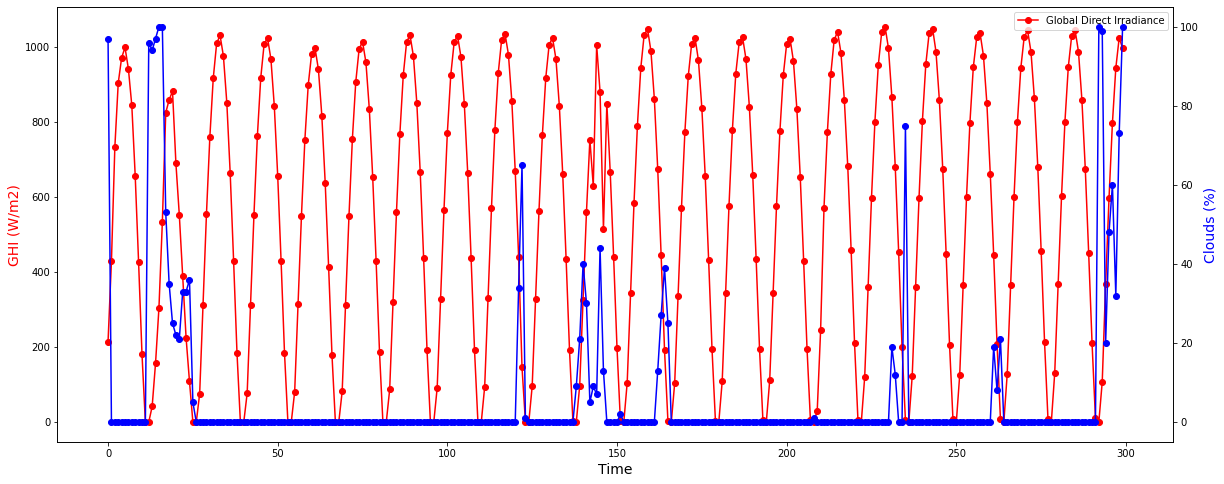

In [7]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20,8))
ax.plot(data['ghi'].iloc[start_index:end_index].values, color="red", label = "Global Direct Irradiance",marker="o")
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("GHI (W/m2)",color="red",fontsize=14)
plt.legend()
ax2=ax.twinx()
ax2.plot(data[f'cloud_{prefix}'].iloc[start_index:end_index].values,color="blue",label = f"Cloud {prefix} %",marker="o")
ax2.set_ylabel("Clouds (%)",color="blue",fontsize=14)
plt.show()

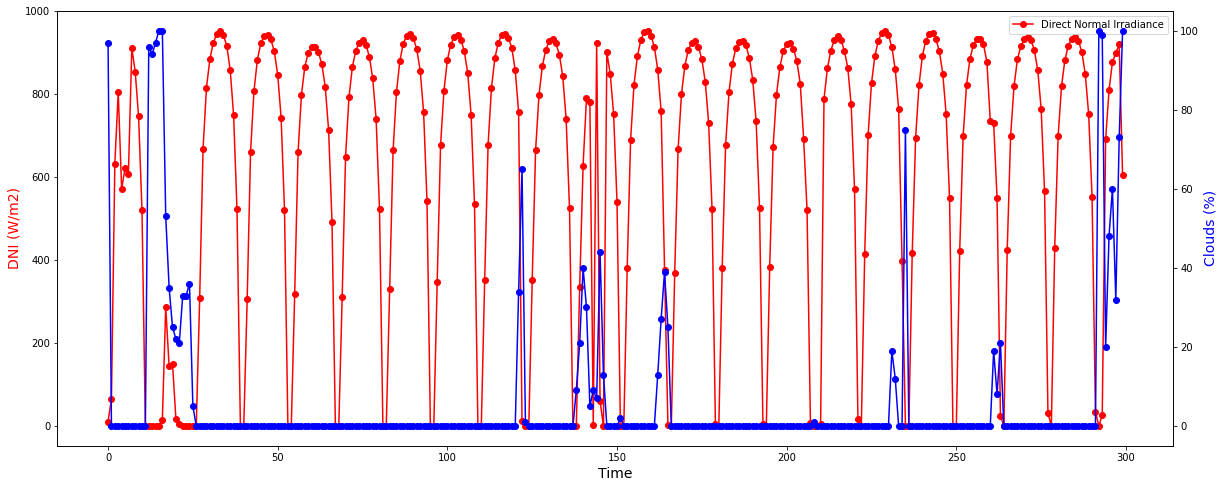

In [8]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20,8))
ax.plot(data['dni'].iloc[start_index:end_index].values, color="red", label = "Direct Normal Irradiance",marker="o")
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("DNI (W/m2)",color="red",fontsize=14)
plt.legend()
ax2=ax.twinx()
ax2.plot(data[f'cloud_{prefix}'].iloc[start_index:end_index].values,color="blue",label = f"Cloud {prefix} %",marker="o")
ax2.set_ylabel("Clouds (%)",color="blue",fontsize=14)
plt.show()

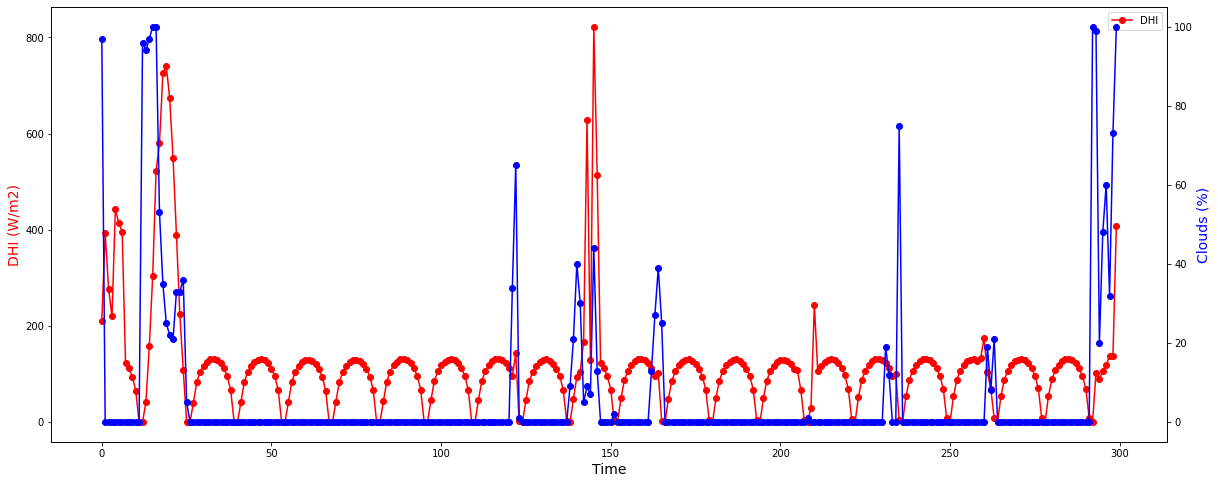

In [9]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20,8))
ax.plot(data['dhi'].iloc[start_index:end_index].values, color="red", label = "DHI",marker="o")
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("DHI (W/m2)",color="red",fontsize=14)
plt.legend()
ax2=ax.twinx()
ax2.plot(data[f'cloud_{prefix}'].iloc[start_index:end_index].values,color="blue",label = f"Cloud {prefix} %",marker="o")
ax2.set_ylabel("Clouds (%)",color="blue",fontsize=14)
plt.show()

In [10]:
high_clouds = OLD.loat_clouds('high')
low_clouds = OLD.loat_clouds('low')
med_clouds = OLD.loat_clouds('meduim')

In [11]:
timestep = 128
high = high_clouds.variables['cc'][timestep,:,:]
low = low_clouds.variables['cc'][timestep,:,:]
med = med_clouds.variables['cc'][timestep,:,:]
data_path = os.path.join(DATAPATH,"ghi.nc") 
GHI = Dataset(data_path,mode = 'r')
GHI_data = np.array(GHI.variables["ghi"][timestep,:,:])
data_path = os.path.join(DATAPATH,"dni.nc") 
DNI = Dataset(data_path,mode = 'r')
DNI_data = np.array(DNI.variables["dni"][timestep,:,:])
data_path = os.path.join(DATAPATH,"dhi.nc") 
DHI = Dataset(data_path,mode = 'r')
DHI_data = np.array(DHI.variables["dhi"][timestep,:,:])

data_path = os.path.join(DATAPATH,"aod.nc") 
netcdf_dataset_aod = Dataset(data_path,mode = 'r')
aod = np.array(netcdf_dataset_aod.variables["aod5503d"][timestep,:,:])


data_path = os.path.join(DATAPATH,"water_vapor_new.nc") 
netcdf_dataset_wv = Dataset(data_path,model = 'r')
water_vapor = np.array(netcdf_dataset_wv.variables["qvapor"][timestep,:,:])



data_path = os.path.join(DATAPATH,"ozone.nc") 
netcdf_dataset_ozone = Dataset(data_path)
ozone = np.array(netcdf_dataset_ozone.variables["o3rad"][timestep,:,:])


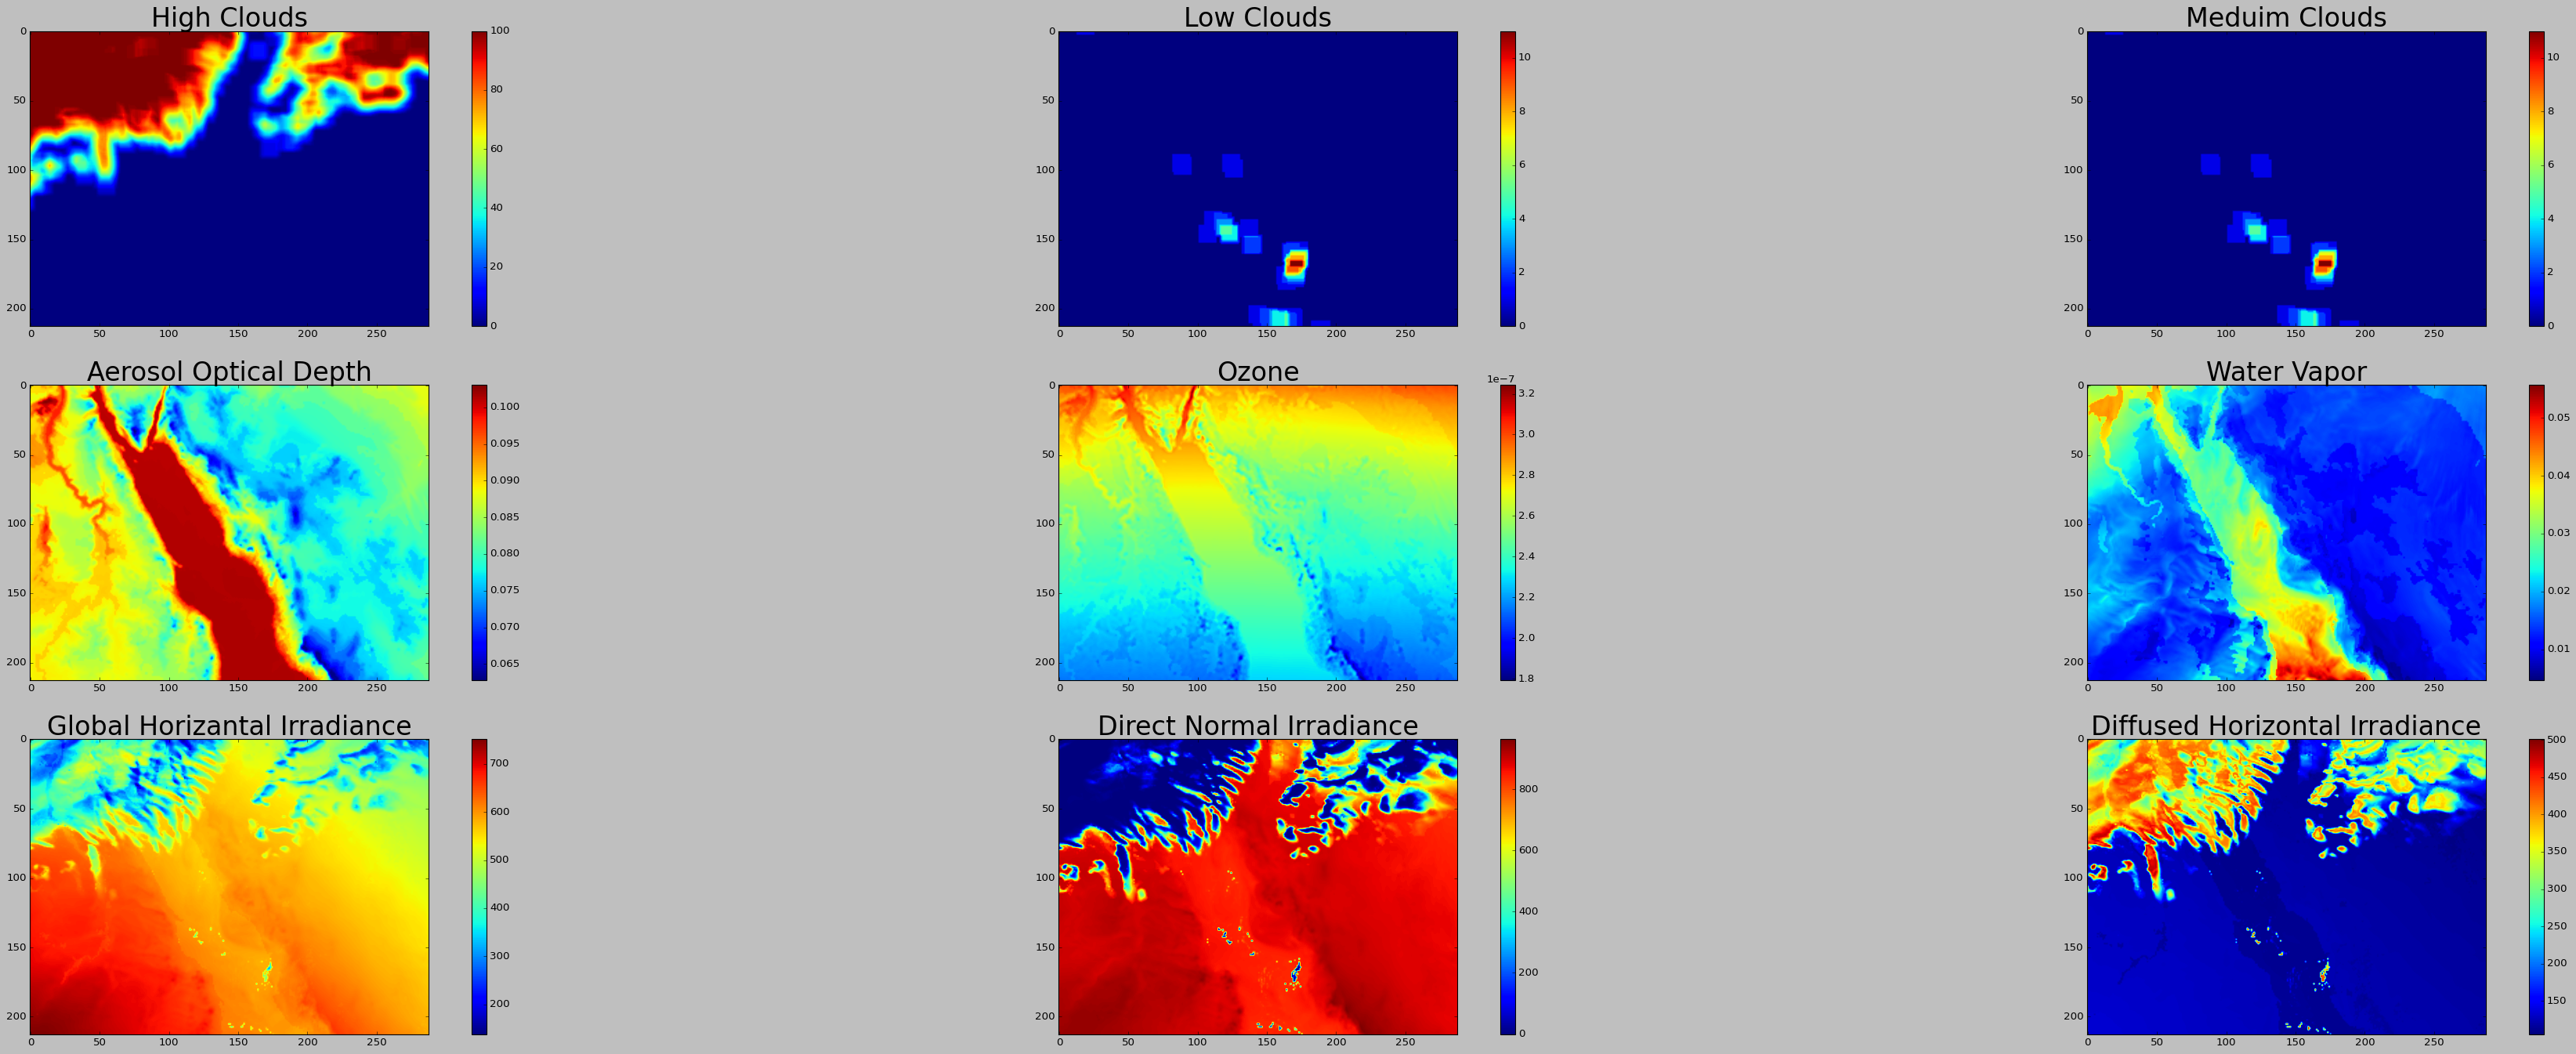

In [12]:
plt.style.use('classic')
plt.figure(figsize = (60,20))
plt.subplot(331)
plt.title("High Clouds",fontsize = 30)
plt.imshow(np.flip(high,axis = 0))
plt.colorbar()
plt.subplot(332)
plt.title('Low Clouds',fontsize = 30)
plt.imshow(np.flip(low,axis = 0))
plt.colorbar()
plt.subplot(333)
plt.title('Meduim Clouds',fontsize = 30)
plt.imshow(np.flip(med,axis = 0))
plt.colorbar()
plt.subplot(337)
plt.title('Global Horizantal Irradiance',fontsize = 30)
plt.imshow(np.flip(GHI_data,axis = 0))
plt.colorbar()
plt.subplot(338)
plt.title('Direct Normal Irradiance',fontsize = 30)
plt.imshow(np.flip(DNI_data,axis = 0))
plt.colorbar()
plt.subplot(339)
plt.title('Diffused Horizontal Irradiance',fontsize = 30)
plt.imshow(np.flip(DHI_data,axis = 0))
plt.colorbar()
plt.subplot(334)
plt.title('Aerosol Optical Depth',fontsize = 30)
plt.imshow(np.flip(aod,axis = 0))
plt.colorbar()
plt.subplot(335)
plt.title('Ozone',fontsize = 30)
plt.imshow(np.flip(ozone,axis = 0))
plt.colorbar()
plt.subplot(336)
plt.title('Water Vapor',fontsize = 30)
plt.imshow(np.flip(water_vapor,axis = 0))
plt.colorbar()


In [13]:
corr_mat = signal.correlate2d(np.flip(DNI_data,axis = 0),np.flip(high,axis = 0),boundary='symm', mode='same')

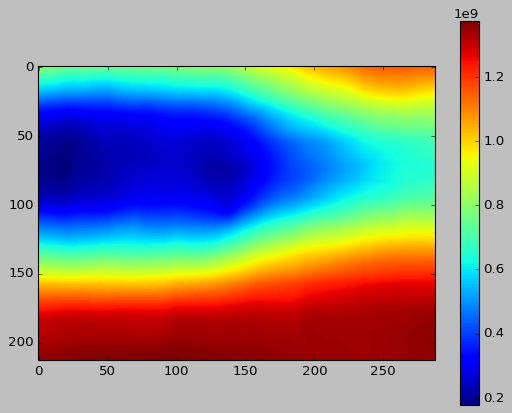

In [14]:
plt.imshow(corr_mat)
plt.colorbar()